In [40]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import norm
from SBRx import sosf,acf,ps,sosfnorm,sosfw

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

In [41]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
lr=[6562.8,6548,6583,6717,6731]#AngstromsR
lb=[4861.36,4958.9,5006.9]#AngstromsB
#LimitData
min0=75
max0=130

In [42]:
inputf='595.Isis.WHT.Red.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

In [43]:
for i in 0,2,4:
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lr[Nx])/lr[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataII'+str(int(lr[Nx]))+'.csv')

In [44]:
datap='dataII6562.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,369.00000,369.000000,369.000000,369.000000
mean,101.91600,10.555556,-1017.841296,1190.327263
std,15.88847,7.003320,15594.515616,1745.710725
min,75.09600,0.000000,-299766.779000,0.000000
25%,88.50600,5.000000,-213.594837,269.400000
50%,101.91600,11.000000,-204.641445,533.400000
75%,115.32600,15.000000,-196.555984,1159.000000
max,128.73600,22.000000,-177.781268,9957.000000


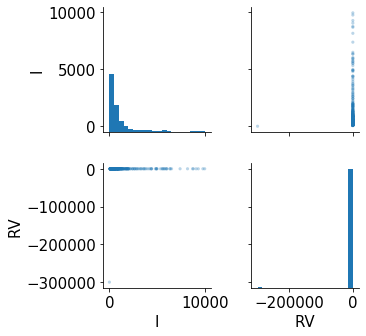

In [45]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [46]:
mf=(dt.I<30000)&(dt.I>10)
dt=dt[mf]
mrv=(dt.RV<-100)&(dt.RV>-300)
dt=dt[mrv]

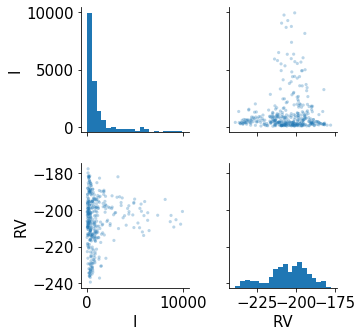

In [47]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [48]:
dataH=dt.copy()

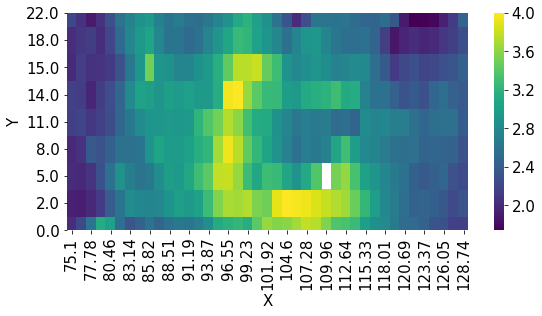

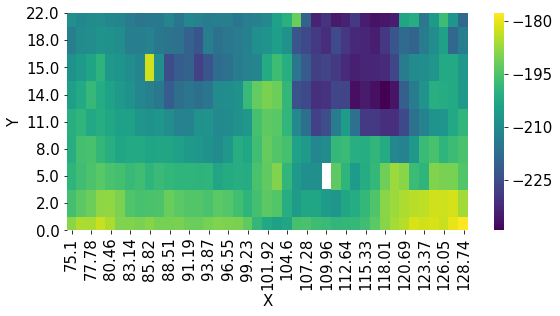

In [49]:
datal=dt.copy()
datal.I=np.log10(datal.I)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(dataH_f, cmap="viridis")
plt.gca().invert_yaxis()

datal=dt.copy()
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(dataH_f, cmap="viridis")
plt.gca().invert_yaxis()



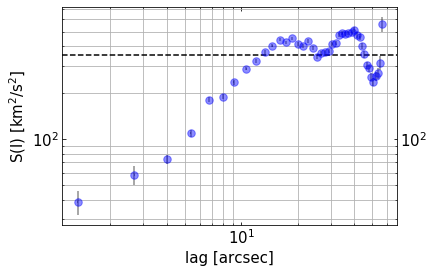

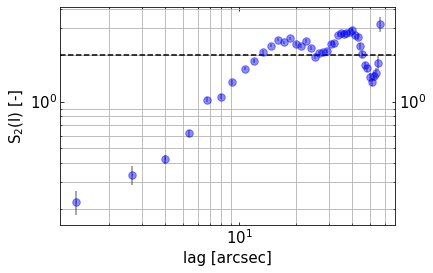

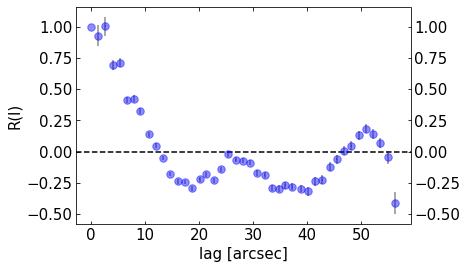

In [50]:
sfH00=sosf(dt)
sfnH00=sosfnorm(dt)
#sfwH00=sosfw(dt)
#sfw2H00=sosfw(dt)
afH00=acf(dt)
#psH00=ps(dt)

In [51]:
datap='dataII6583.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,369.00000,369.000000,369.000000,369.000000
mean,101.91600,10.555556,-994.291321,227.986802
std,15.88847,7.003320,15595.745511,403.647821
min,75.09600,0.000000,-299766.779000,0.000000
25%,88.50600,5.000000,-190.910147,41.940000
50%,101.91600,11.000000,-181.574364,82.860000
75%,115.32600,15.000000,-174.105739,224.800000
max,128.73600,22.000000,-90.948967,4581.000000


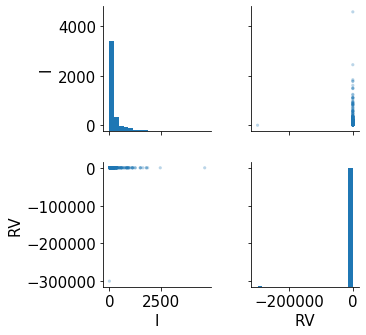

In [52]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [53]:
mf=(dt.I<2500)&(dt.I>10)
dt=dt[mf]
mrv=(dt.RV<-150)&(dt.RV>-250)
dt=dt[mrv]

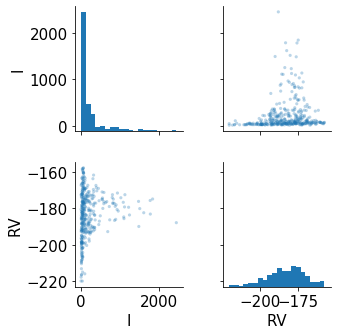

In [54]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [55]:
dataN=dt.copy()

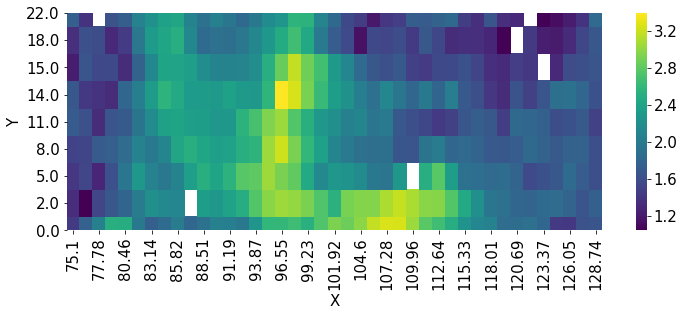

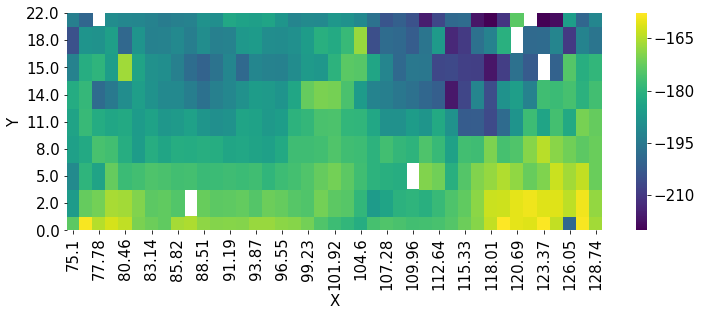

In [56]:
datal=dt.copy()
datal.I=np.log10(datal.I)
dataN_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataN_f, cmap="viridis")
plt.gca().invert_yaxis()

datal=dt.copy()
dataN_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataN_rv, cmap="viridis")
plt.gca().invert_yaxis()

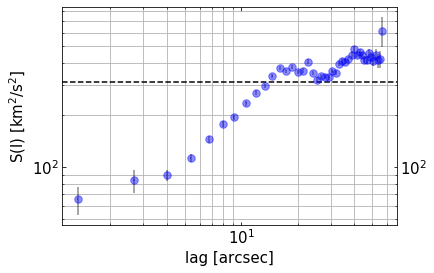

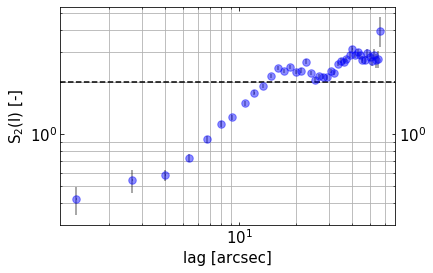

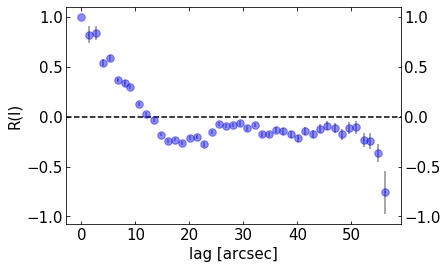

In [57]:
sfN00=sosf(dt)
sfnN00=sosfnorm(dt)
#sfwN00=sosfw(dt)
#sfw2N00=sosfw(dt)
afN00=acf(dt)
#psN00=ps(dt)

In [58]:
datap='dataII6731.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,369.00000,369.000000,369.000000,369.000000
mean,101.91600,10.555556,-995.917405,75.678025
std,15.88847,7.003320,15595.680320,140.973482
min,75.09600,0.000000,-299766.779000,-14.990000
25%,88.50600,5.000000,-191.447951,18.420000
50%,101.91600,11.000000,-184.232622,33.300000
75%,115.32600,15.000000,-177.106371,81.630000
max,128.73600,22.000000,9.779553,1937.000000


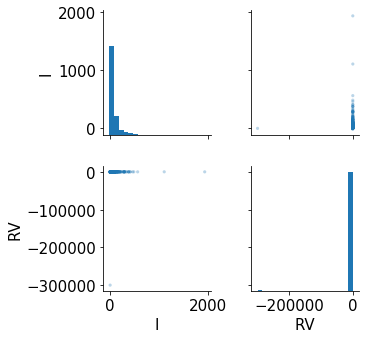

In [59]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [60]:
mf=(dt.I<1000)&(dt.I>10)
dt=dt[mf]
mrv=(dt.RV<-140)&(dt.RV>-240)
dt=dt[mrv]

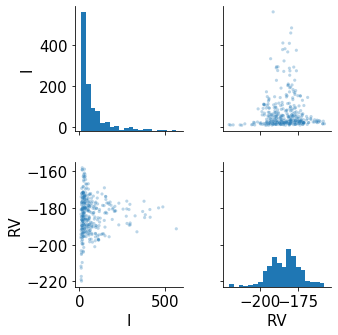

In [61]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [62]:
dataS=dt.copy()

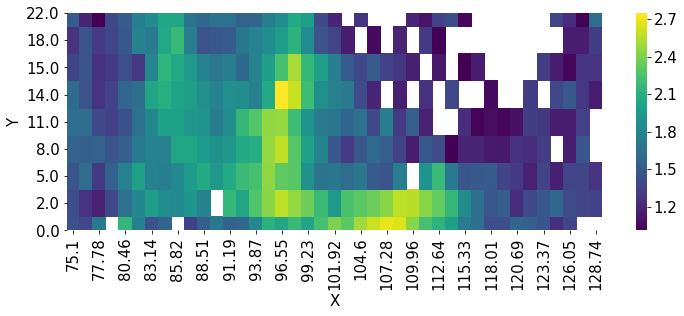

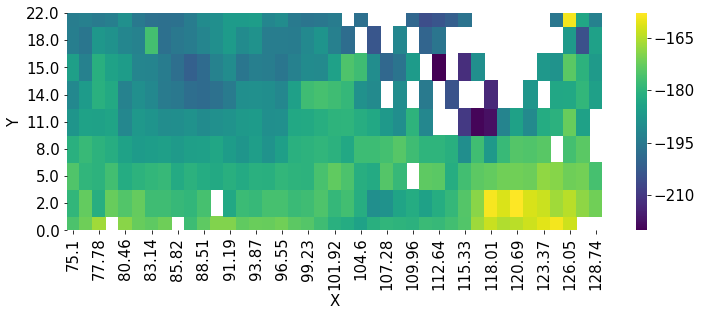

In [63]:
datal=dt.copy()
datal.I=np.log10(datal.I)
dataS_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataS_f, cmap="viridis")
plt.gca().invert_yaxis()

datal=dt.copy()
dataS_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataS_rv, cmap="viridis")
plt.gca().invert_yaxis()

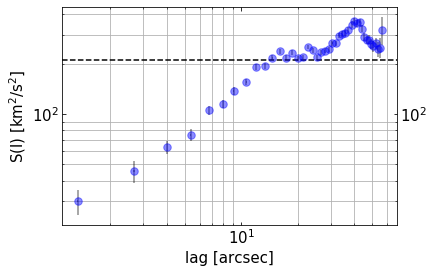

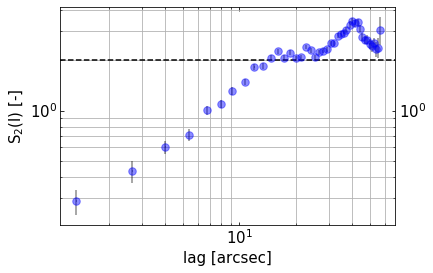

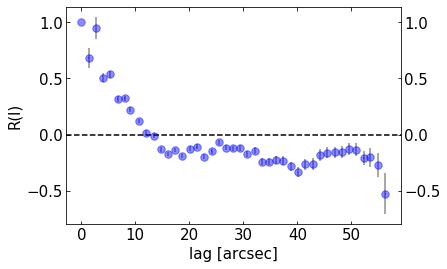

In [64]:
sfS00=sosf(dt)
sfnS00=sosfnorm(dt)
#sfwS00=sosfw(dt)
#sfw2S00=sosfw(dt)
afS00=acf(dt)
#psS00=ps(dt)

In [65]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
#lr=[6562.8,6548,6583,6717,6731]#AngstromsR
lb=[4861.36,4958.9,5006.9]#AngstromsB
#LimitData
min0=95
max0=135

inputf='595.Isis.WHT.Blue.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

In [66]:
for i in 0,2:
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lb[Nx])/lb[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataII'+str(int(lb[Nx]))+'.csv')

In [67]:
datap='dataII5006.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,252.000000,252.000000,252.000000,252.000000
mean,115.147200,10.555556,-2473.936748,1802.137913
std,11.577403,7.007743,26664.743203,25897.169791
min,95.836800,0.000000,-299766.779000,-35.280000
25%,105.492000,5.000000,-216.996873,13.150000
50%,115.147200,11.000000,-199.662811,23.135000
75%,124.802400,15.000000,-189.588697,46.680000
max,134.457600,22.000000,12008.816112,409800.000000


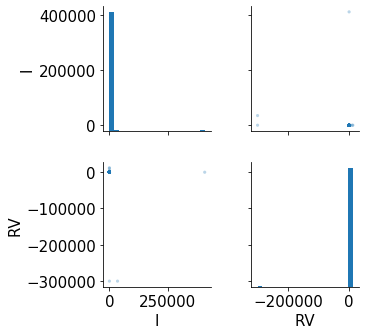

In [68]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [69]:
mf=(dt.I<1000)&(dt.I>10)
dt=dt[mf]
mrv=(dt.RV<-150)&(dt.RV>-250)
dt=dt[mrv]

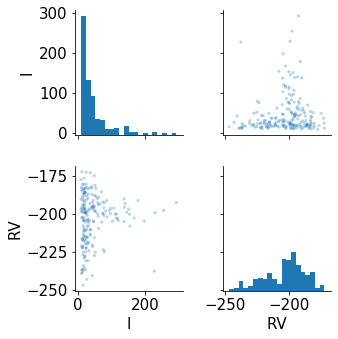

In [70]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [71]:
dataO=dt.copy()

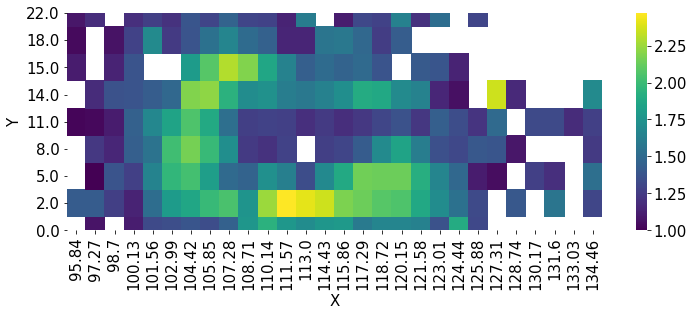

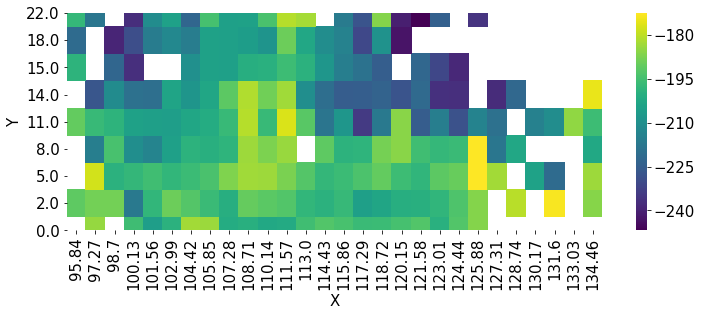

In [72]:
datal=dt.copy()
datal.I=np.log10(datal.I)
dataO_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataO_f, cmap="viridis")
plt.gca().invert_yaxis()

datal=dt.copy()
dataO_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataO_rv, cmap="viridis")
plt.gca().invert_yaxis()

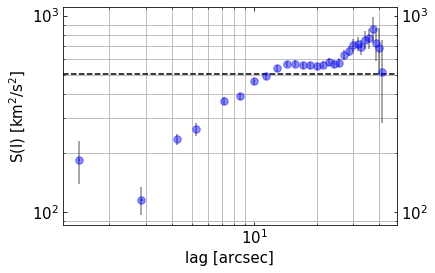

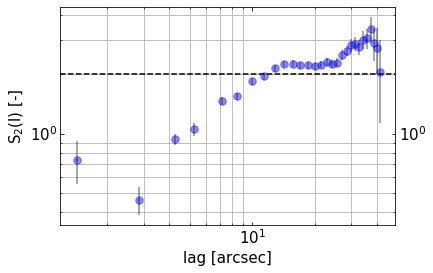

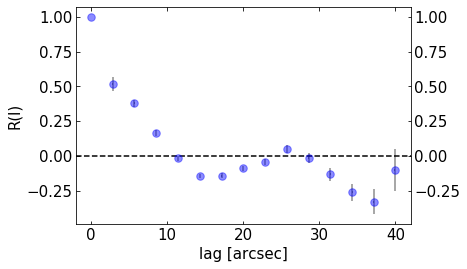

In [73]:
sfO00=sosf(dt)
sfnO00=sosfnorm(dt)
#sfwO00=sosfw(dt)
#sfw2O00=sosfw(dt)
afO00=acf(dt)
#psS00=ps(dt)

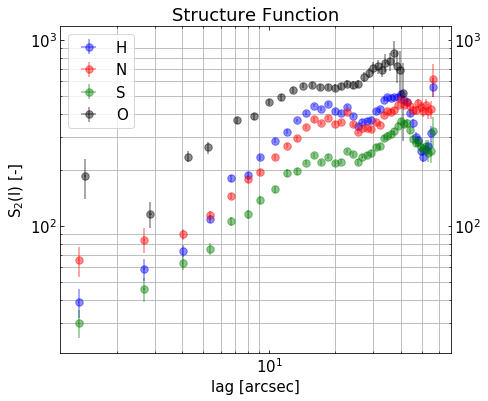

In [74]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfH00['Lag'],sfH00['Nmqvd'],xerr=sfH00.ErrX, yerr=sfH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='H')
ax.errorbar(sfN00['Lag'],sfN00['Nmqvd'],xerr=sfN00.ErrX, yerr=sfN00.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='N')
ax.errorbar(sfS00['Lag'],sfS00['Nmqvd'],xerr=sfS00.ErrX, yerr=sfS00.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='S')
ax.errorbar(sfO00['Lag'],sfO00['Nmqvd'],xerr=sfO00.ErrX, yerr=sfO00.ErrY, fmt="o",color='k', ecolor='k', alpha=0.45, markersize=7.5, label='O')
#ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
#ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Structure Function')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

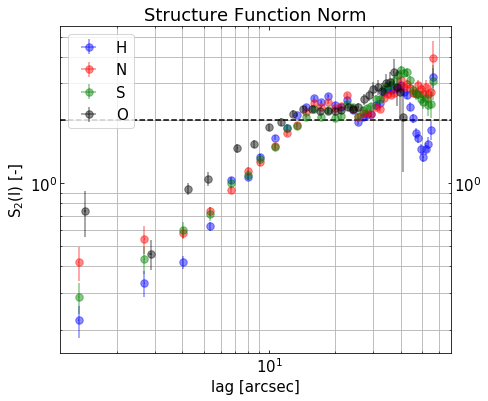

In [75]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfnH00['Lag'],sfnH00['Nmqvd'],xerr=sfnH00.ErrX, yerr=sfnH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='H')
ax.errorbar(sfnN00['Lag'],sfnN00['Nmqvd'],xerr=sfnN00.ErrX, yerr=sfnN00.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='N')
ax.errorbar(sfnS00['Lag'],sfnS00['Nmqvd'],xerr=sfnS00.ErrX, yerr=sfnS00.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='S')
ax.errorbar(sfnO00['Lag'],sfnO00['Nmqvd'],xerr=sfnO00.ErrX, yerr=sfnO00.ErrY, fmt="o",color='k', ecolor='k', alpha=0.45, markersize=7.5, label='O')
#ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
#ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Structure Function Norm')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfwH00['Lag'],sfwH00['Nmqvd'],xerr=sfwH00.ErrX, yerr=sfwH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='H')
ax.errorbar(sfwN00['Lag'],sfwN00['Nmqvd'],xerr=sfwN00.ErrX, yerr=sfwN00.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='N')
ax.errorbar(sfwS00['Lag'],sfwS00['Nmqvd'],xerr=sfwS00.ErrX, yerr=sfwS00.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='S')
ax.errorbar(sfwO00['Lag'],sfwO00['Nmqvd'],xerr=sfwO00.ErrX, yerr=sfwO00.ErrY, fmt="o",color='k', ecolor='k', alpha=0.45, markersize=7.5, label='O')
#ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
#ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Structure Function W')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfw2H00['Lag'],sfw2H00['Nmqvd'],xerr=sfw2H00.ErrX, yerr=sfw2H00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='H')
ax.errorbar(sfw2N00['Lag'],sfw2N00['Nmqvd'],xerr=sfw2N00.ErrX, yerr=sfw2N00.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='N')
ax.errorbar(sfw2S00['Lag'],sfw2S00['Nmqvd'],xerr=sfw2S00.ErrX, yerr=sfw2S00.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='S')
ax.errorbar(sfw2O00['Lag'],sfw2O00['Nmqvd'],xerr=sfw2O00.ErrX, yerr=sfw2O00.ErrY, fmt="o",color='k', ecolor='k', alpha=0.45, markersize=7.5, label='O')
#ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
#ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Structure Function WII')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

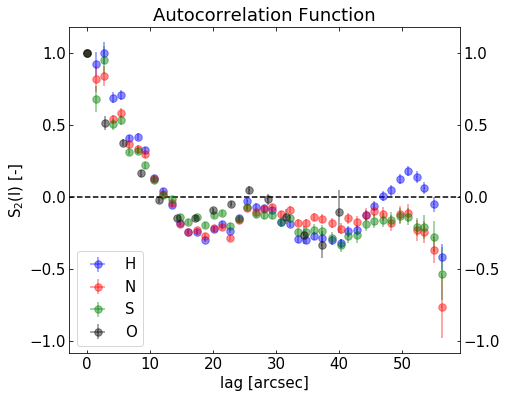

In [76]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(afH00['Lag'],afH00['Nmqvd'],xerr=afH00.ErrX, yerr=afH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='H')
ax.errorbar(afN00['Lag'],afN00['Nmqvd'],xerr=afN00.ErrX, yerr=afN00.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='N')
ax.errorbar(afS00['Lag'],afS00['Nmqvd'],xerr=afS00.ErrX, yerr=afS00.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='S')
ax.errorbar(afO00['Lag'],afO00['Nmqvd'],xerr=afO00.ErrX, yerr=afO00.ErrY, fmt="o",color='k', ecolor='k', alpha=0.45, markersize=7.5, label='O')
#ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
#ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
#ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
ax.axhline(y=0, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Autocorrelation Function')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='lower left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

In [77]:
histH=dataH.RV-dataH.RV.mean()
histN=dataN.RV-dataN.RV.mean()
histS=dataS.RV-dataS.RV.mean()
histO=dataO.RV-dataO.RV.mean()

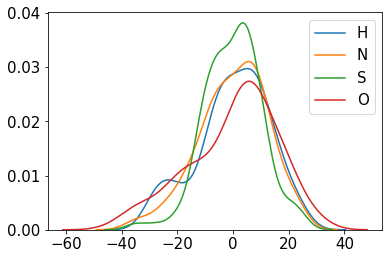

In [78]:
sns.kdeplot(histH, label="H")
sns.kdeplot(histN, label="N")
sns.kdeplot(histS, label="S")
sns.kdeplot(histO, label="O")